# 2.0 Imporing Libraries

In [9]:
import sys
import os

# Add the parent directory to the PYTHONPATH
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import annotate_bars  # Ensure this matches the function name in utils.py


## 3.0 Load the dataset into a dataframe

In [10]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 4.0  Inspect the Dataset

## 4.1 Dataset Structure

In [11]:
print(df.info())
print('Shape of the dataset: ',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
Shape of the dataset:  (1000, 8)


### 📝 Observation:
1. The dataset contains **1000 rows** and **8 features**.
2. The features are:
   - **Categorical**: `gender`, `race_ethnicity`, `parental_level_of_education`, `lunch`, `test_preparation_course`
   - **Numerical**: `math_score`, `reading_score`, `writing_score`
3. Out of the 8 features, only **3 are numerical** (`math_score`, `reading_score`, `writing_score`), and the remaining **5 are categorical** (object data type).

## 4.2 Numerical and Categorical columns

In [12]:
numerical_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print('Categorical Columns: ',categorical_columns.tolist())
print('Numarical Columns: ', numerical_columns.tolist())

Categorical Columns:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numarical Columns:  ['math_score', 'reading_score', 'writing_score']


In [13]:
# Create a dictionary to hold unique categories for each column
categories_dict = {}
for column in categorical_columns:
    categories_dict[f"{column}"] = df[column].unique()
    print('Categories in {0} feature: {1}'.format(column,df[column].unique()))

Categories in gender feature: ['female' 'male']
Categories in race_ethnicity feature: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education feature: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch feature: ['standard' 'free/reduced']
Categories in test_preparation_course feature: ['none' 'completed']


### 📝 Observation:
* The `parental_level_of_education` feature is **ordinal** (has a meaningful order), while the other categorical features are **cardinal** (no inherent order).

### 🎯 Task:
* We need to **define an order** for the `parental_level_of_education` feature to reflect its ordinal nature.

In [14]:
# Define the order for the 'parental_level_of_education' feature (low to high)
education_order = [
    'some high school', 
    'high school', 
    'some college', 
    "associate's degree", 
    "bachelor's degree", 
    "master's degree"
]

## 4.3 Descriptive Statistics

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 📊 Observations:

1. **Mean Scores**:  
   - Reading scores are generally higher than math and writing scores on average.

2. **Standard Deviation**:  
   - Scores show similar variability, indicating a moderate spread around the mean.

3. **Range**:  
   - Math scores have the widest range, including scores as low as zero.

4. **Quartiles**:  
   - Reading and writing scores consistently outperform math scores across all quartile levels.

## Mising values

In [16]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 📝 Observation:
- The dataset has **no missing values** in any of its features. ✅

## 4.3 Check Duplicates

In [17]:
print(df.duplicated().sum())

0


### 📝 Observation:
- The dataset contains **no duplicate values**. ✅

## Number of unique values

In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Create two featues: average_score and total_score

In [19]:
df['total_score']  = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = round(df['total_score'] / 3, 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


# Data Visulization

## Univariate

In [21]:
numerical_columns = df.select_dtypes(include= 'number').columns

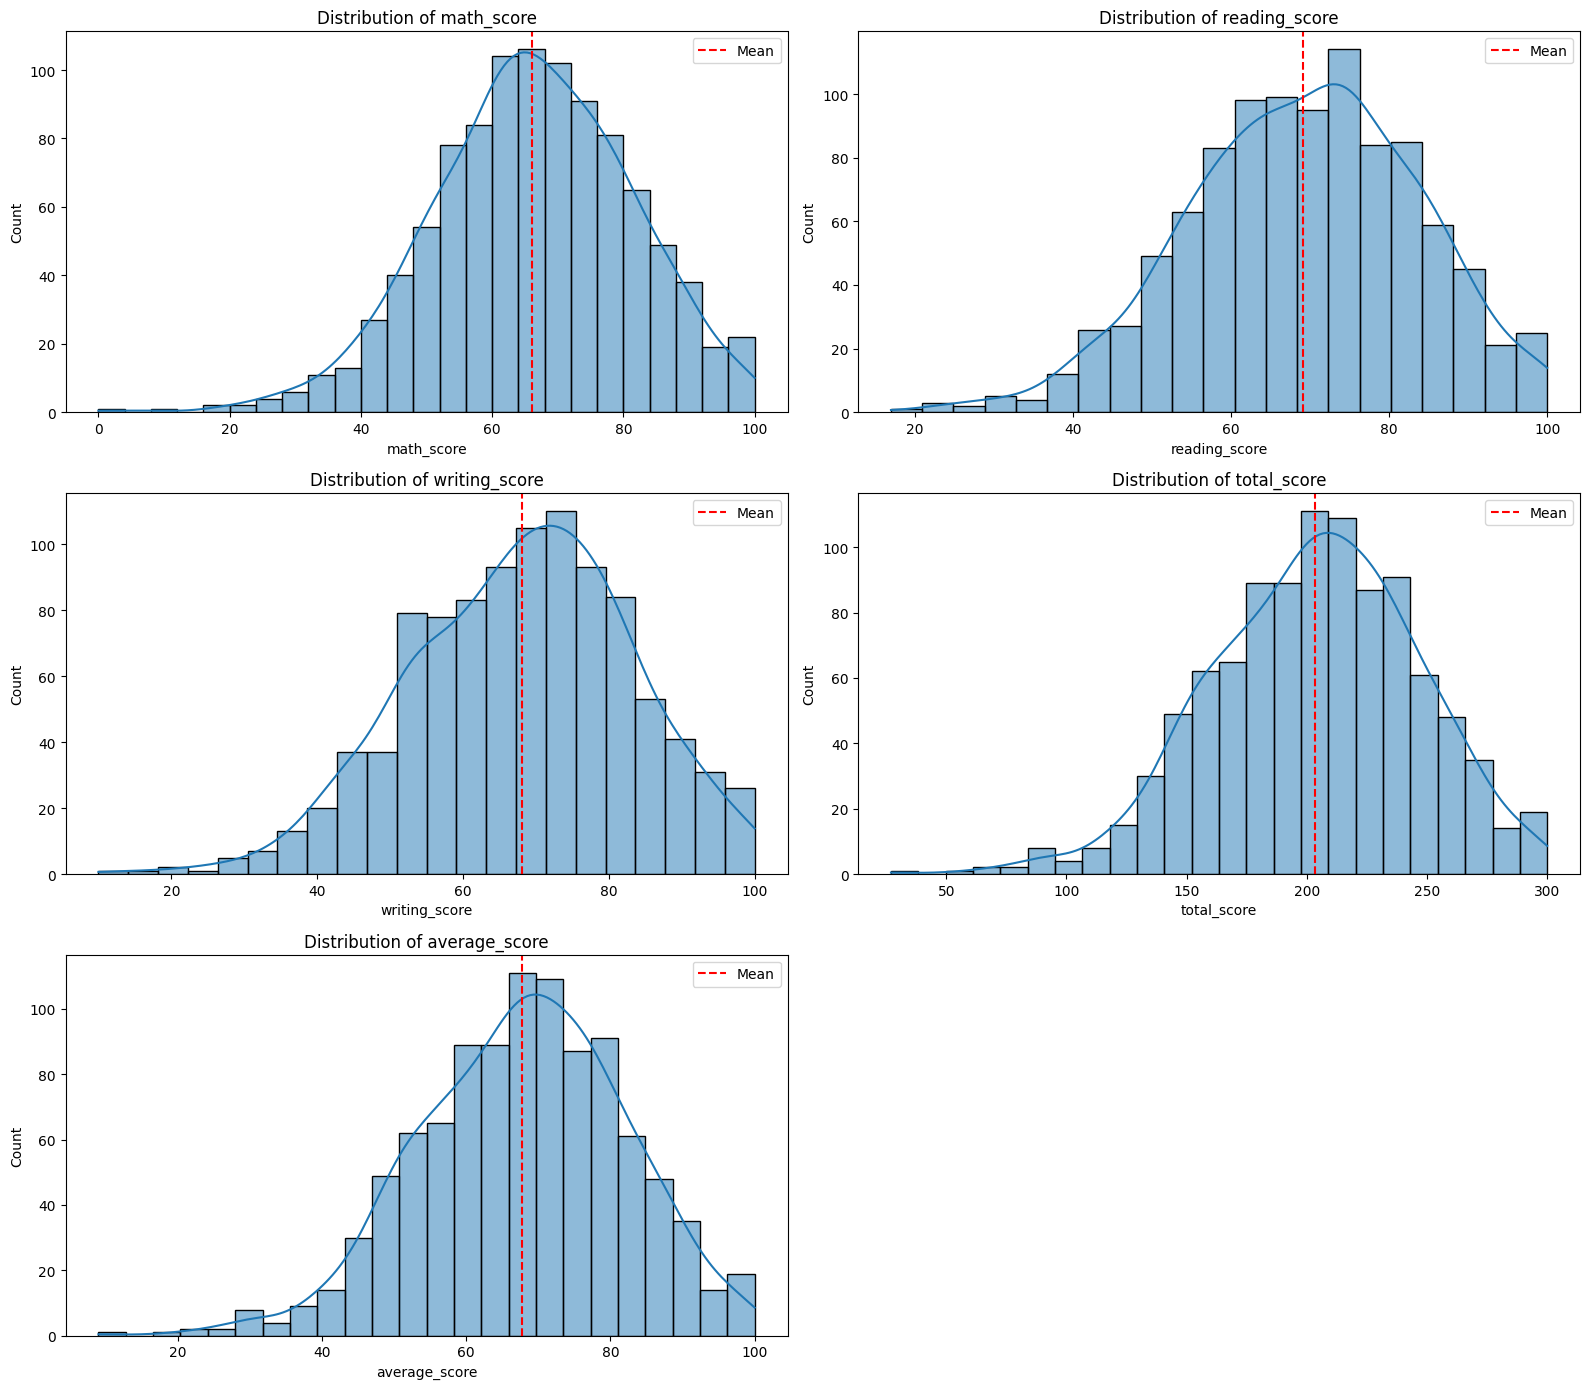

In [23]:
plt.figure(figsize = (16,14))
for i,column in enumerate(numerical_columns):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df, x = column, kde=True)

    # Calcualte the mean and plot 
    mean_value  = df[column].mean()
    plt.axvline(mean_value, color='red', linestyle='--', label = 'Mean')
    plt.title('Distribution of {0}'.format(column))
    plt.legend()

plt.tight_layout()
plt.show()

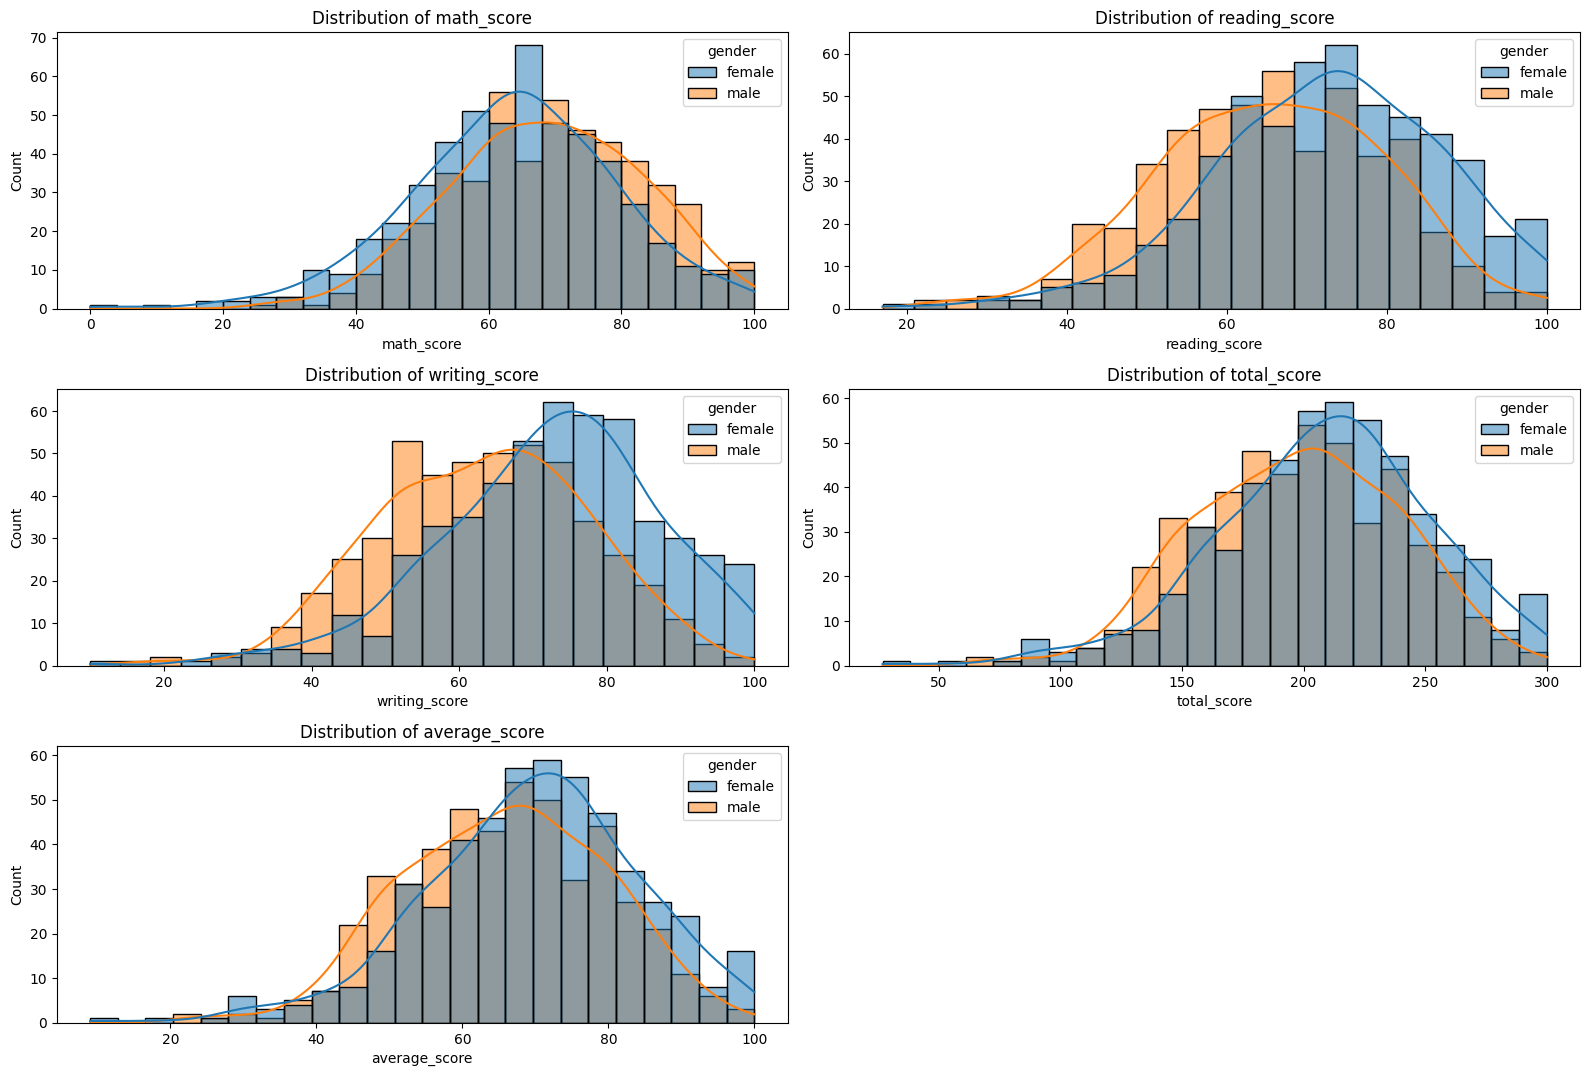

In [24]:
plt.figure(figsize = (16,14))
for i,column in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data = df, x = column, kde=True, hue= 'gender')

    # Calcualte the mean and plot 
    # mean_value  = df[column].mean()
    # plt.axvline(mean_value, color='red', linestyle='--', label = 'Mean')
    
    plt.title('Distribution of {0}'.format(column))
    # plt.legend()

plt.tight_layout()
plt.show()

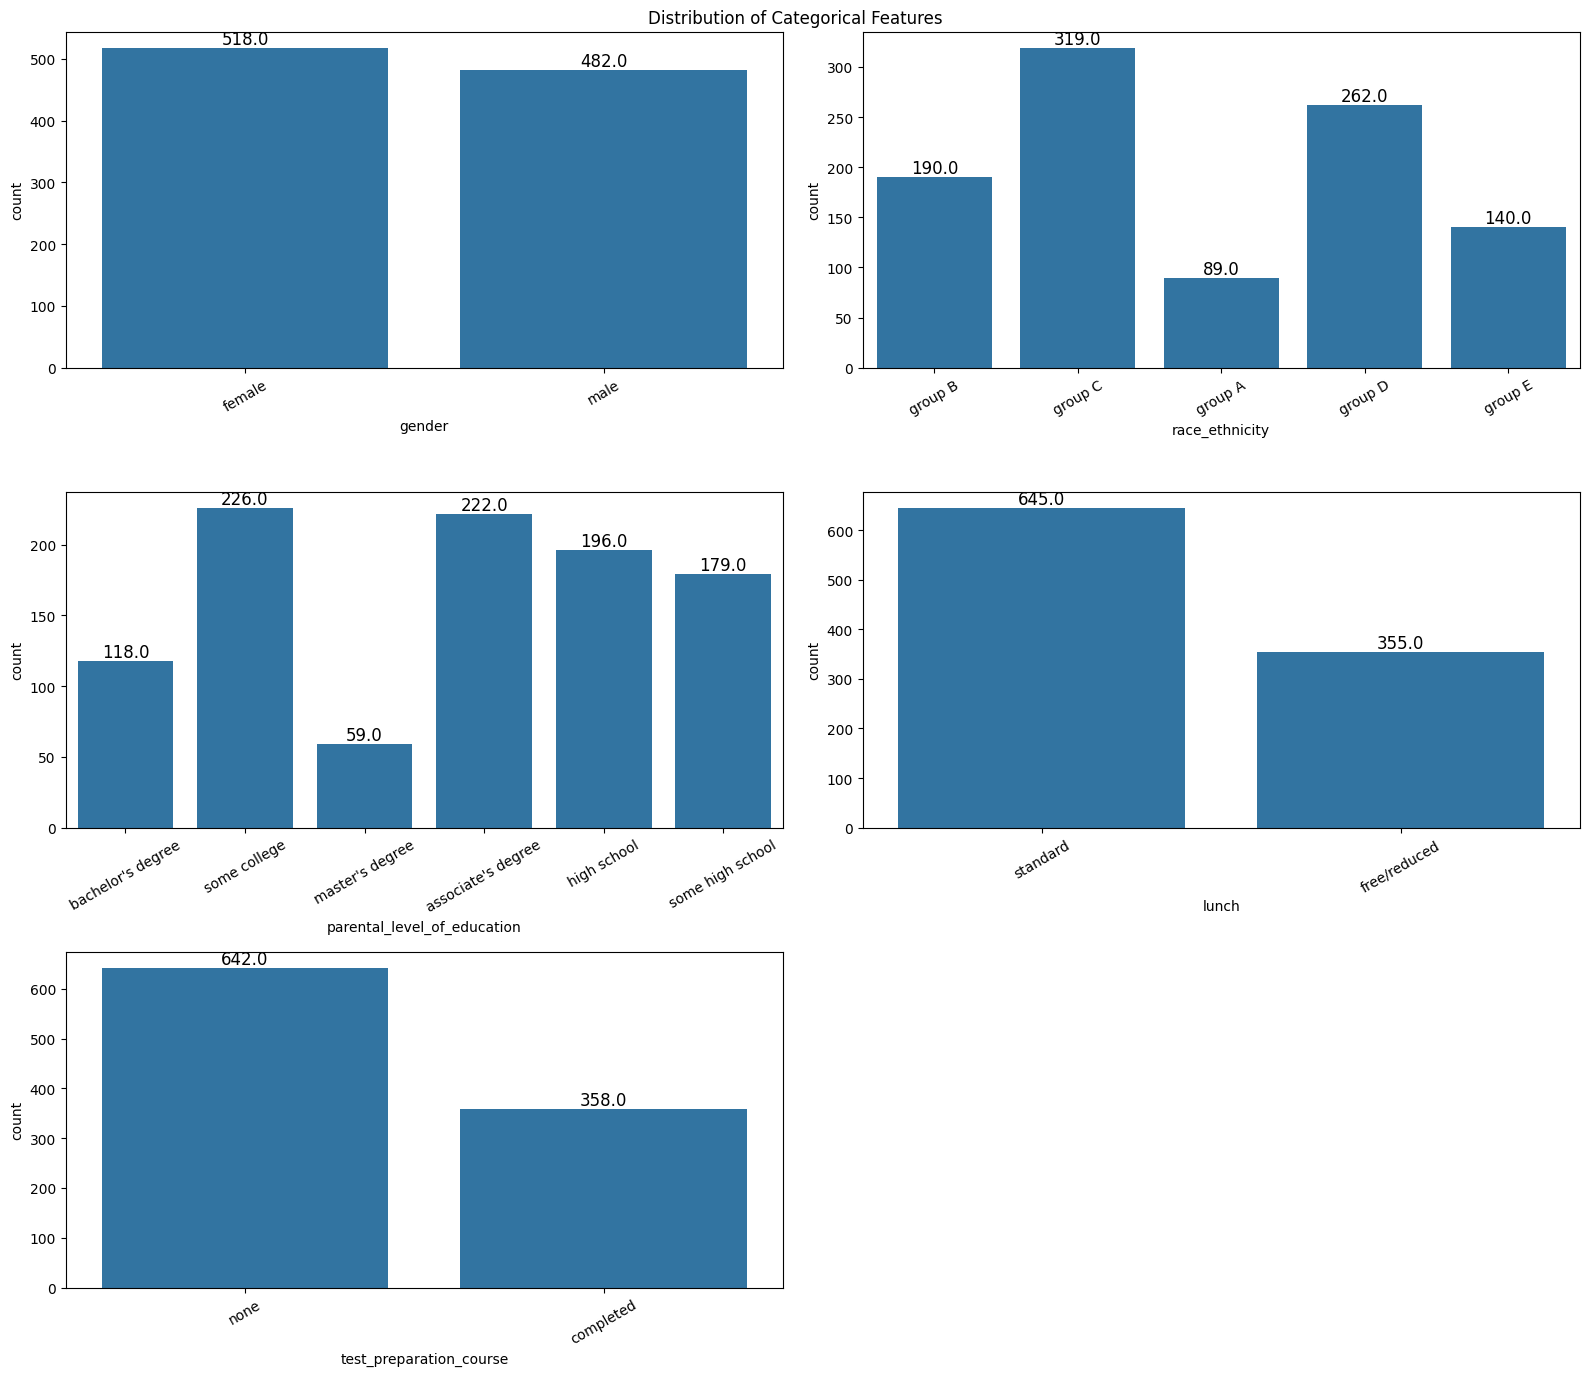

In [25]:
plt.figure(figsize = (16,14))

for i,column in enumerate(categorical_columns):
    plt.subplot(3,2,i+1)
    plt.suptitle('Distribution of Categorical Features')
    sns.countplot(data = df, x = column)

    # Calcualte the mean and plot 
    plt.xticks(rotation = 30)
    annotate_bars(plt.gca())
   
    

plt.tight_layout()
plt.show()

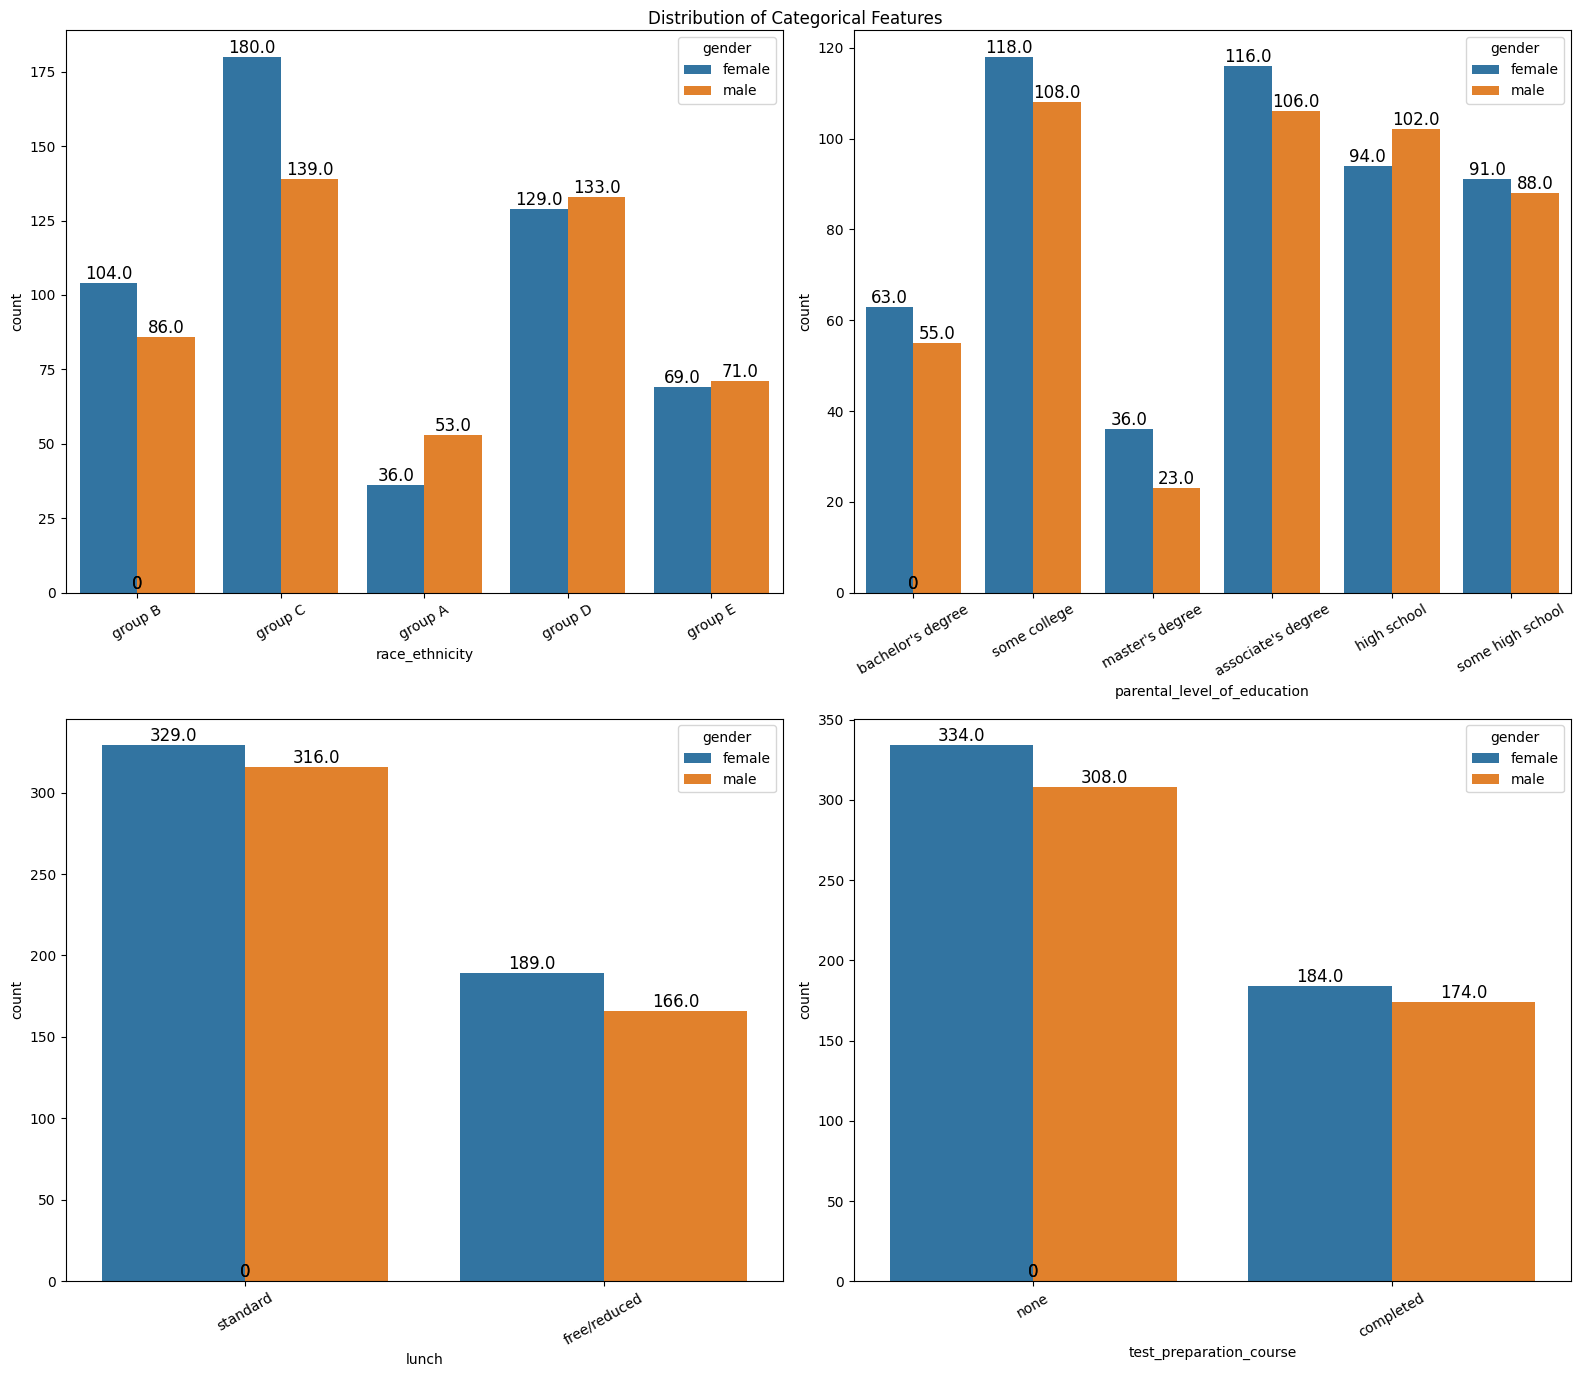

In [26]:
plt.figure(figsize = (16,14))

for i,column in enumerate(categorical_columns[1:]):
    plt.subplot(2,2,i+1)
    plt.suptitle('Distribution of Categorical Features')
    sns.countplot(data = df, x = column, hue = 'gender')

    # Calcualte the mean and plot 
    plt.xticks(rotation = 30)
    annotate_bars(plt.gca())
   
    

plt.tight_layout()
plt.show()

## How lunch affects students marks

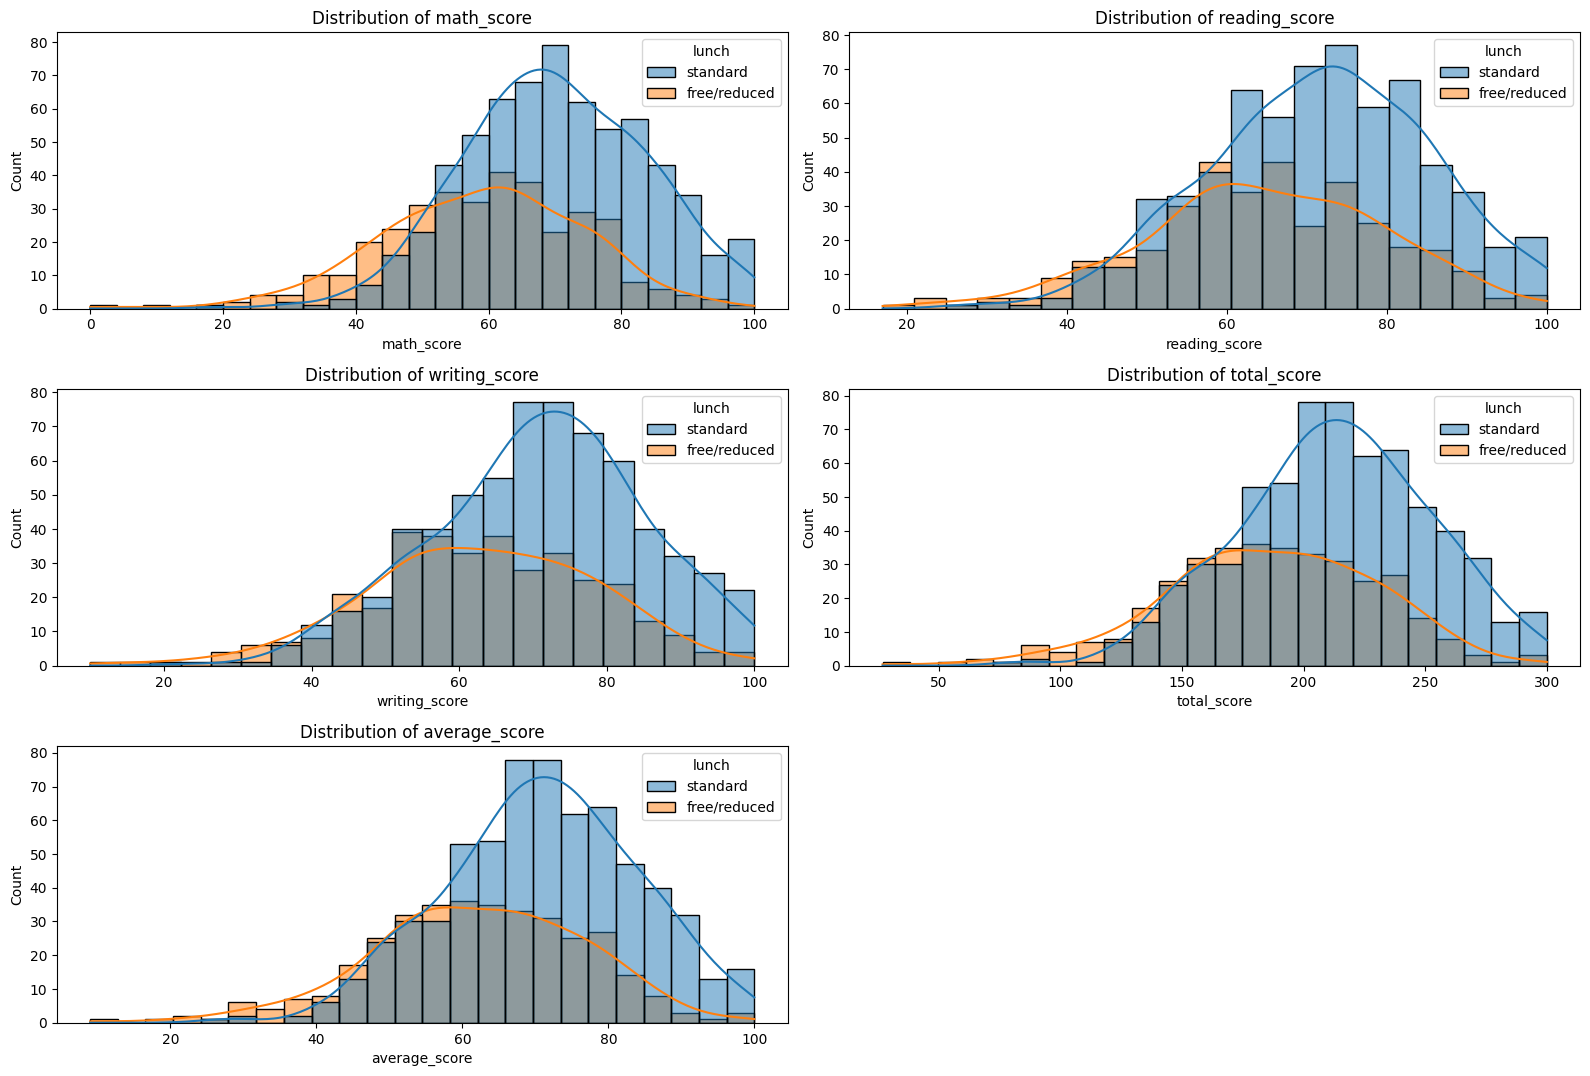

In [27]:
plt.figure(figsize = (16,14))
for i,column in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data = df, x = column, kde=True, hue= 'lunch')

    # Calcualte the mean and plot 
    # mean_value  = df[column].mean()
    # plt.axvline(mean_value, color='red', linestyle='--', label = 'Mean')
    
    plt.title('Distribution of {0}'.format(column))
    # plt.legend()

plt.tight_layout()
plt.show()

Observation:
* Students perform better when they had lunch compare to students who didnt have any lunch.
 

## How `parental_level_of_education` level affects scores

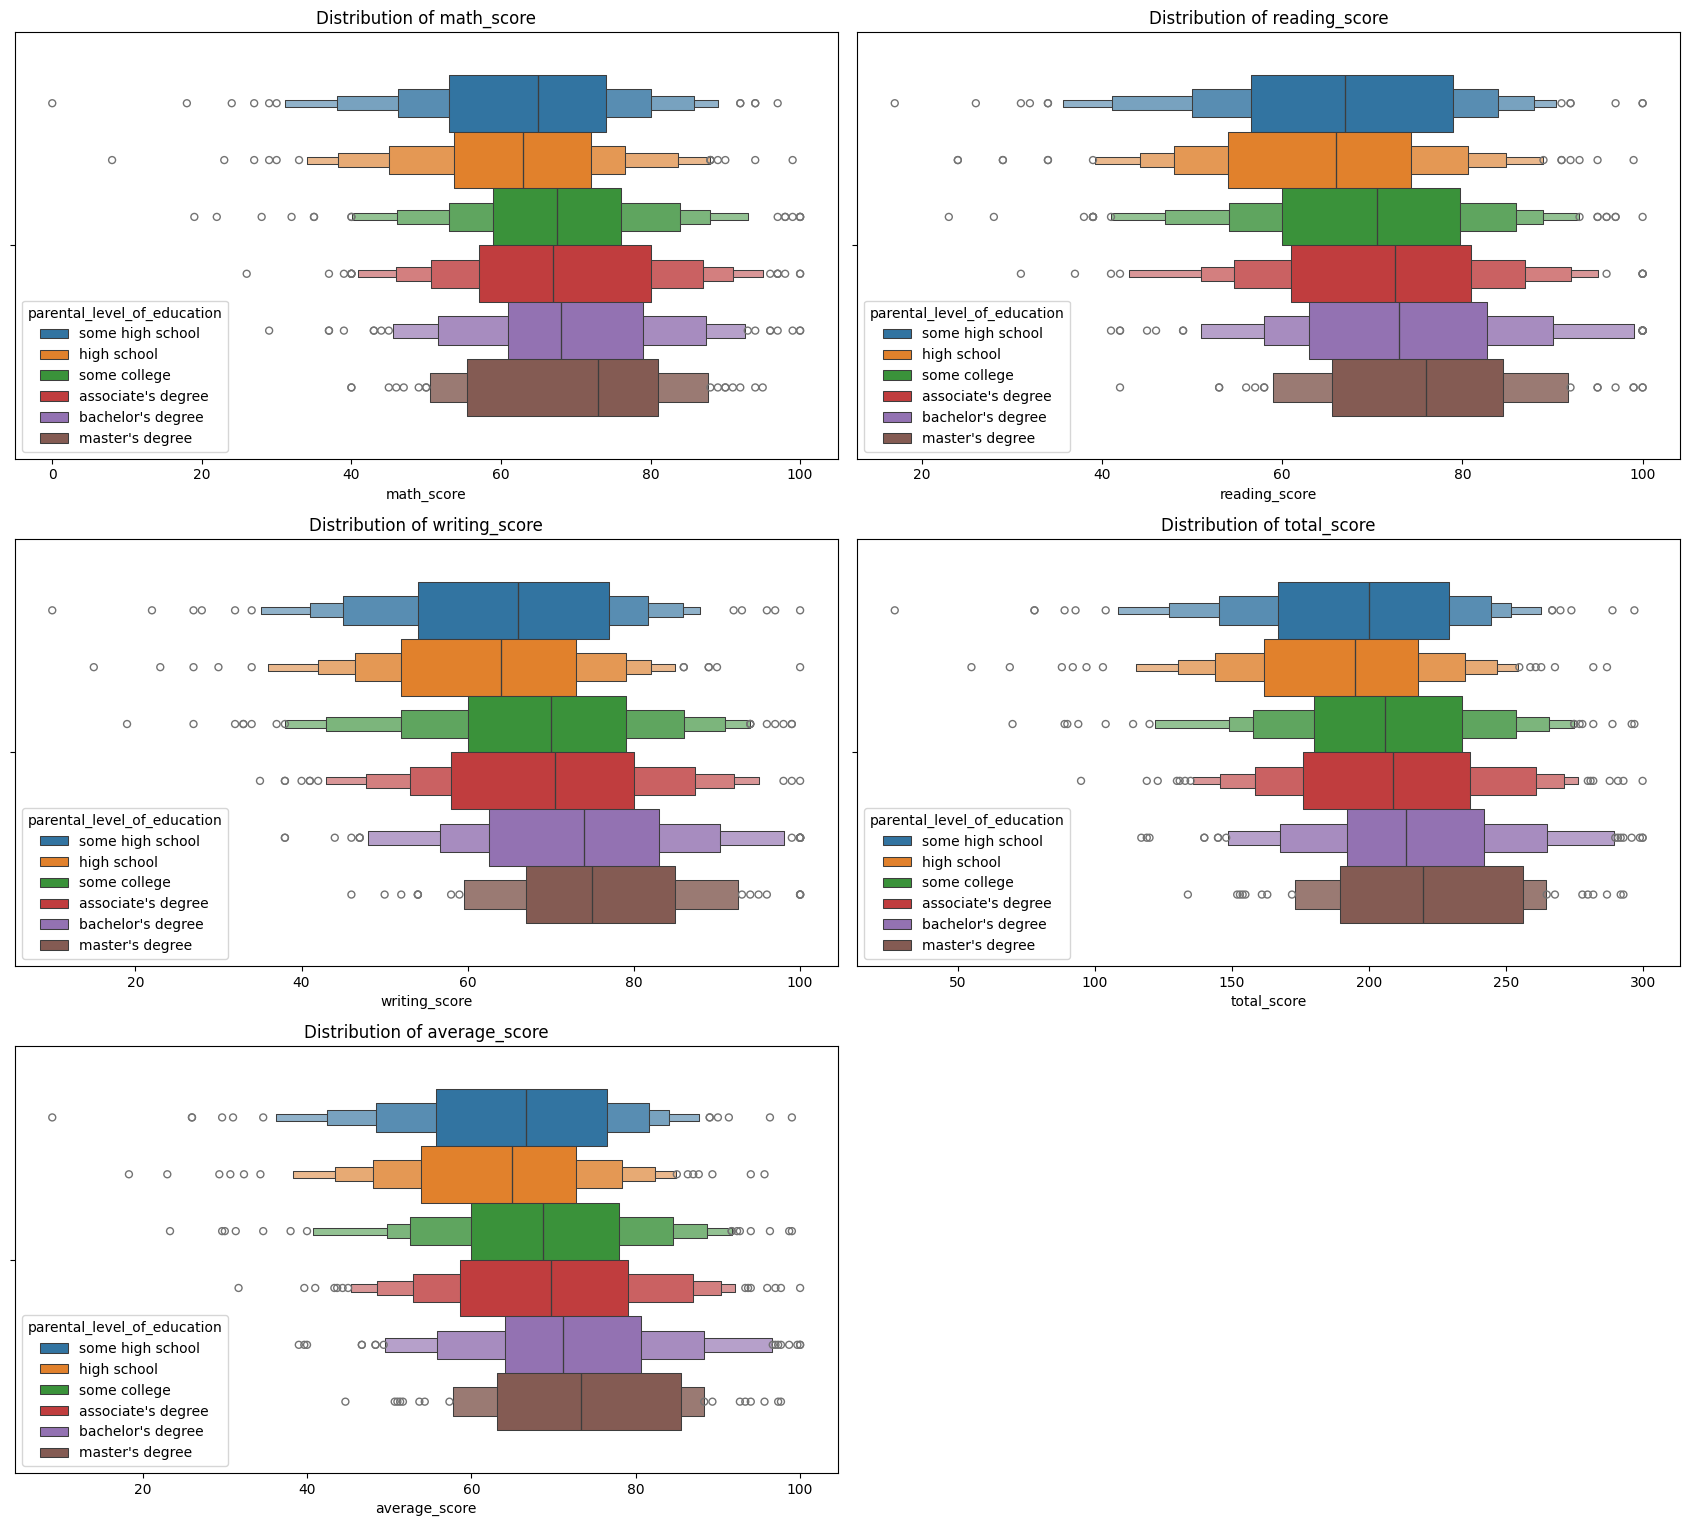

In [28]:
plt.figure(figsize = (17,20))
for i,column in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.boxenplot(data = df, x = column,  hue= 'parental_level_of_education', hue_order= education_order)

    
    plt.title('Distribution of {0}'.format(column))

plt.tight_layout()
plt.show()

### Observations:
- 📈 Students with parents who have a  `Master's` or `Bachelor's` degree tend to achieve higher exam scores.

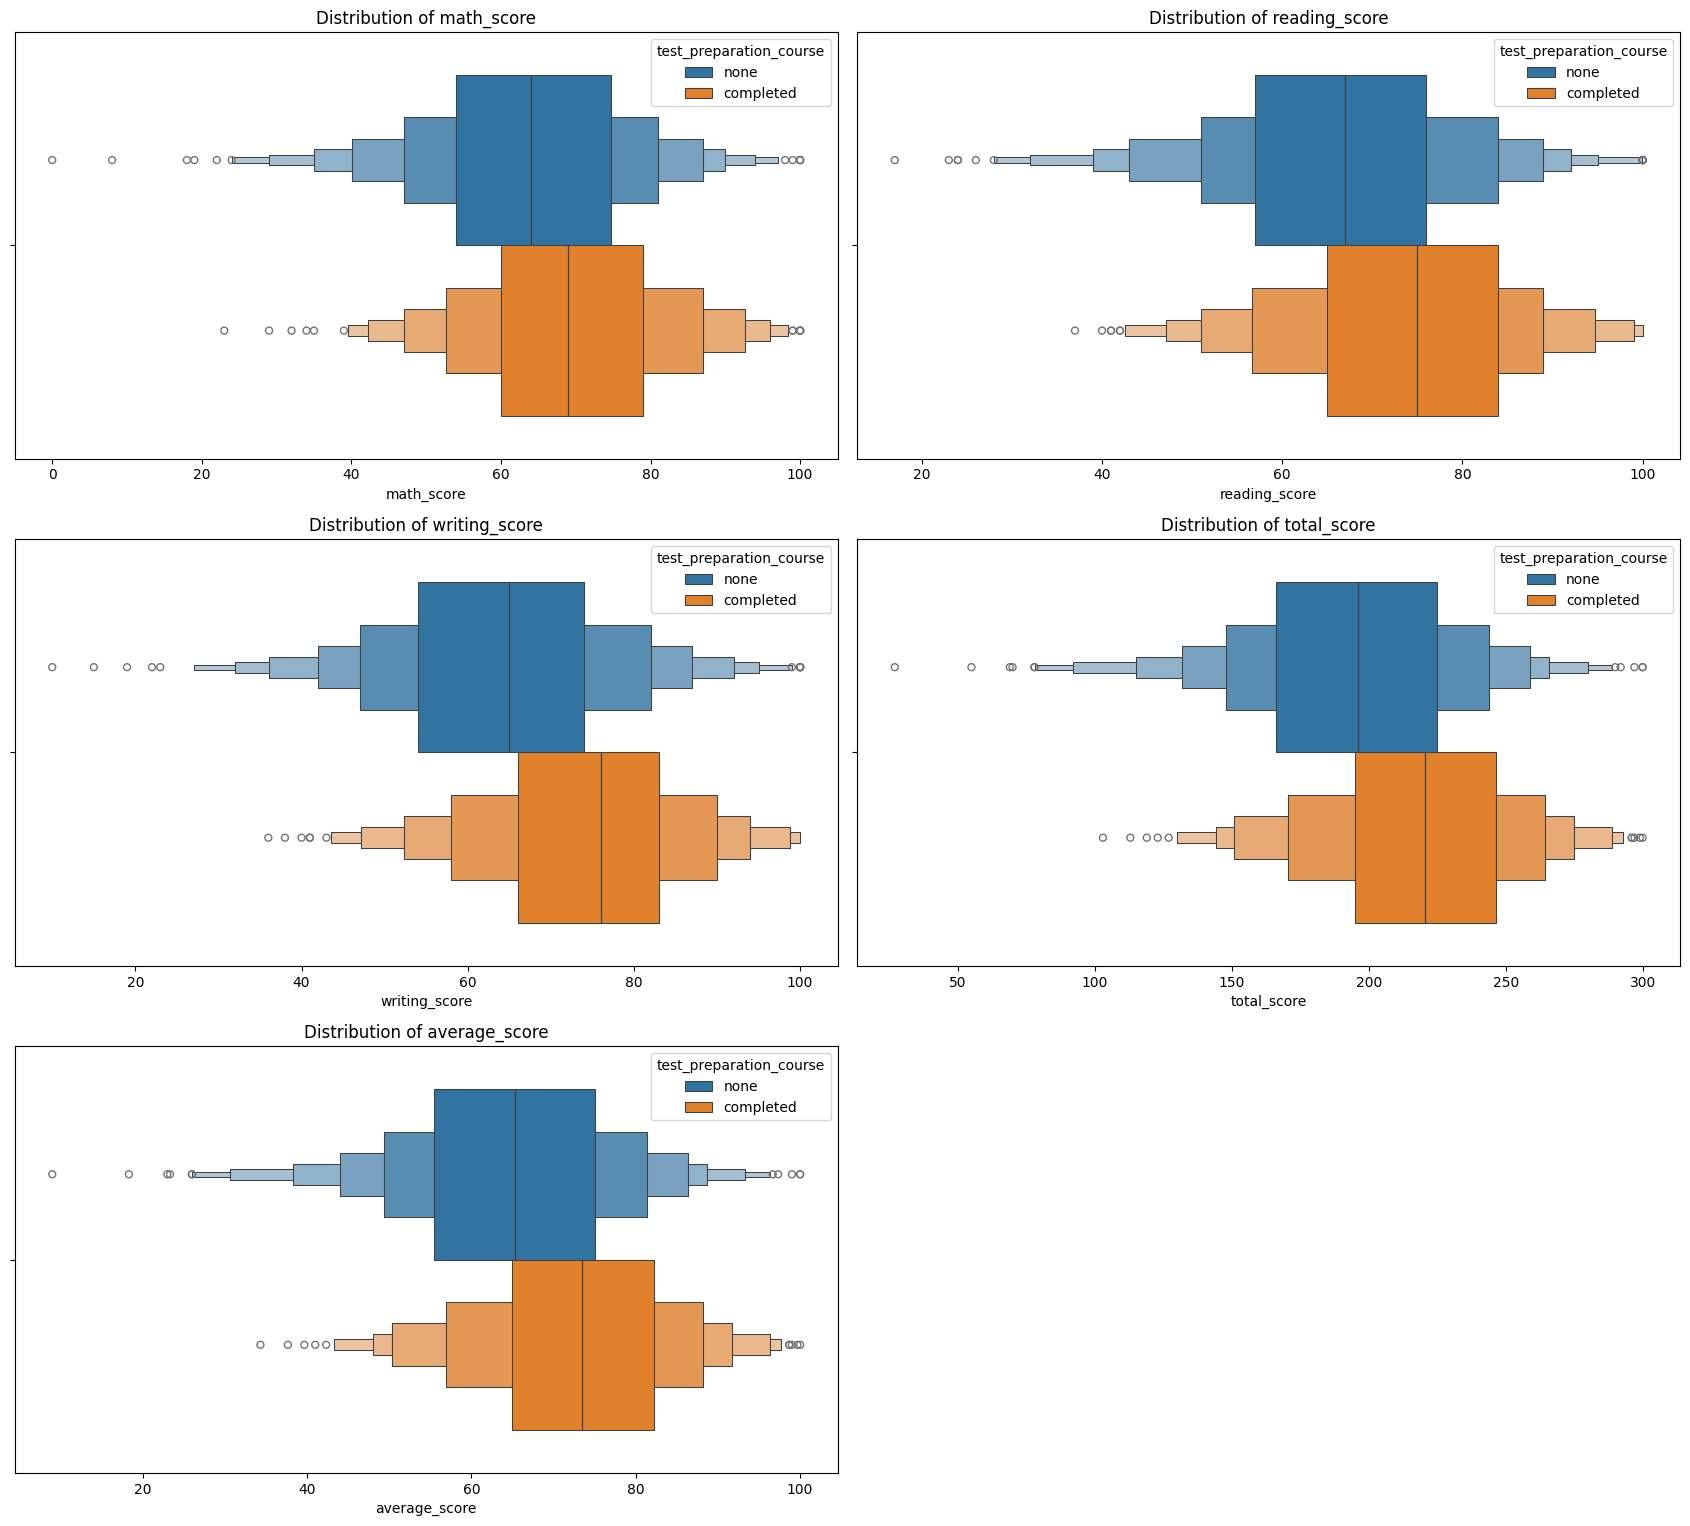

In [29]:
plt.figure(figsize = (17,20))
for i,column in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.boxenplot(data = df, x = column,  hue= 'test_preparation_course')

    
    plt.title('Distribution of {0}'.format(column))

plt.tight_layout()
plt.show()

### Observations:
- 📚 Completing a test preparation course significantly boosted students' overall performance across all subjects, with the **writing score** showing the most improvement.

How `race_ethnicity` affects score|

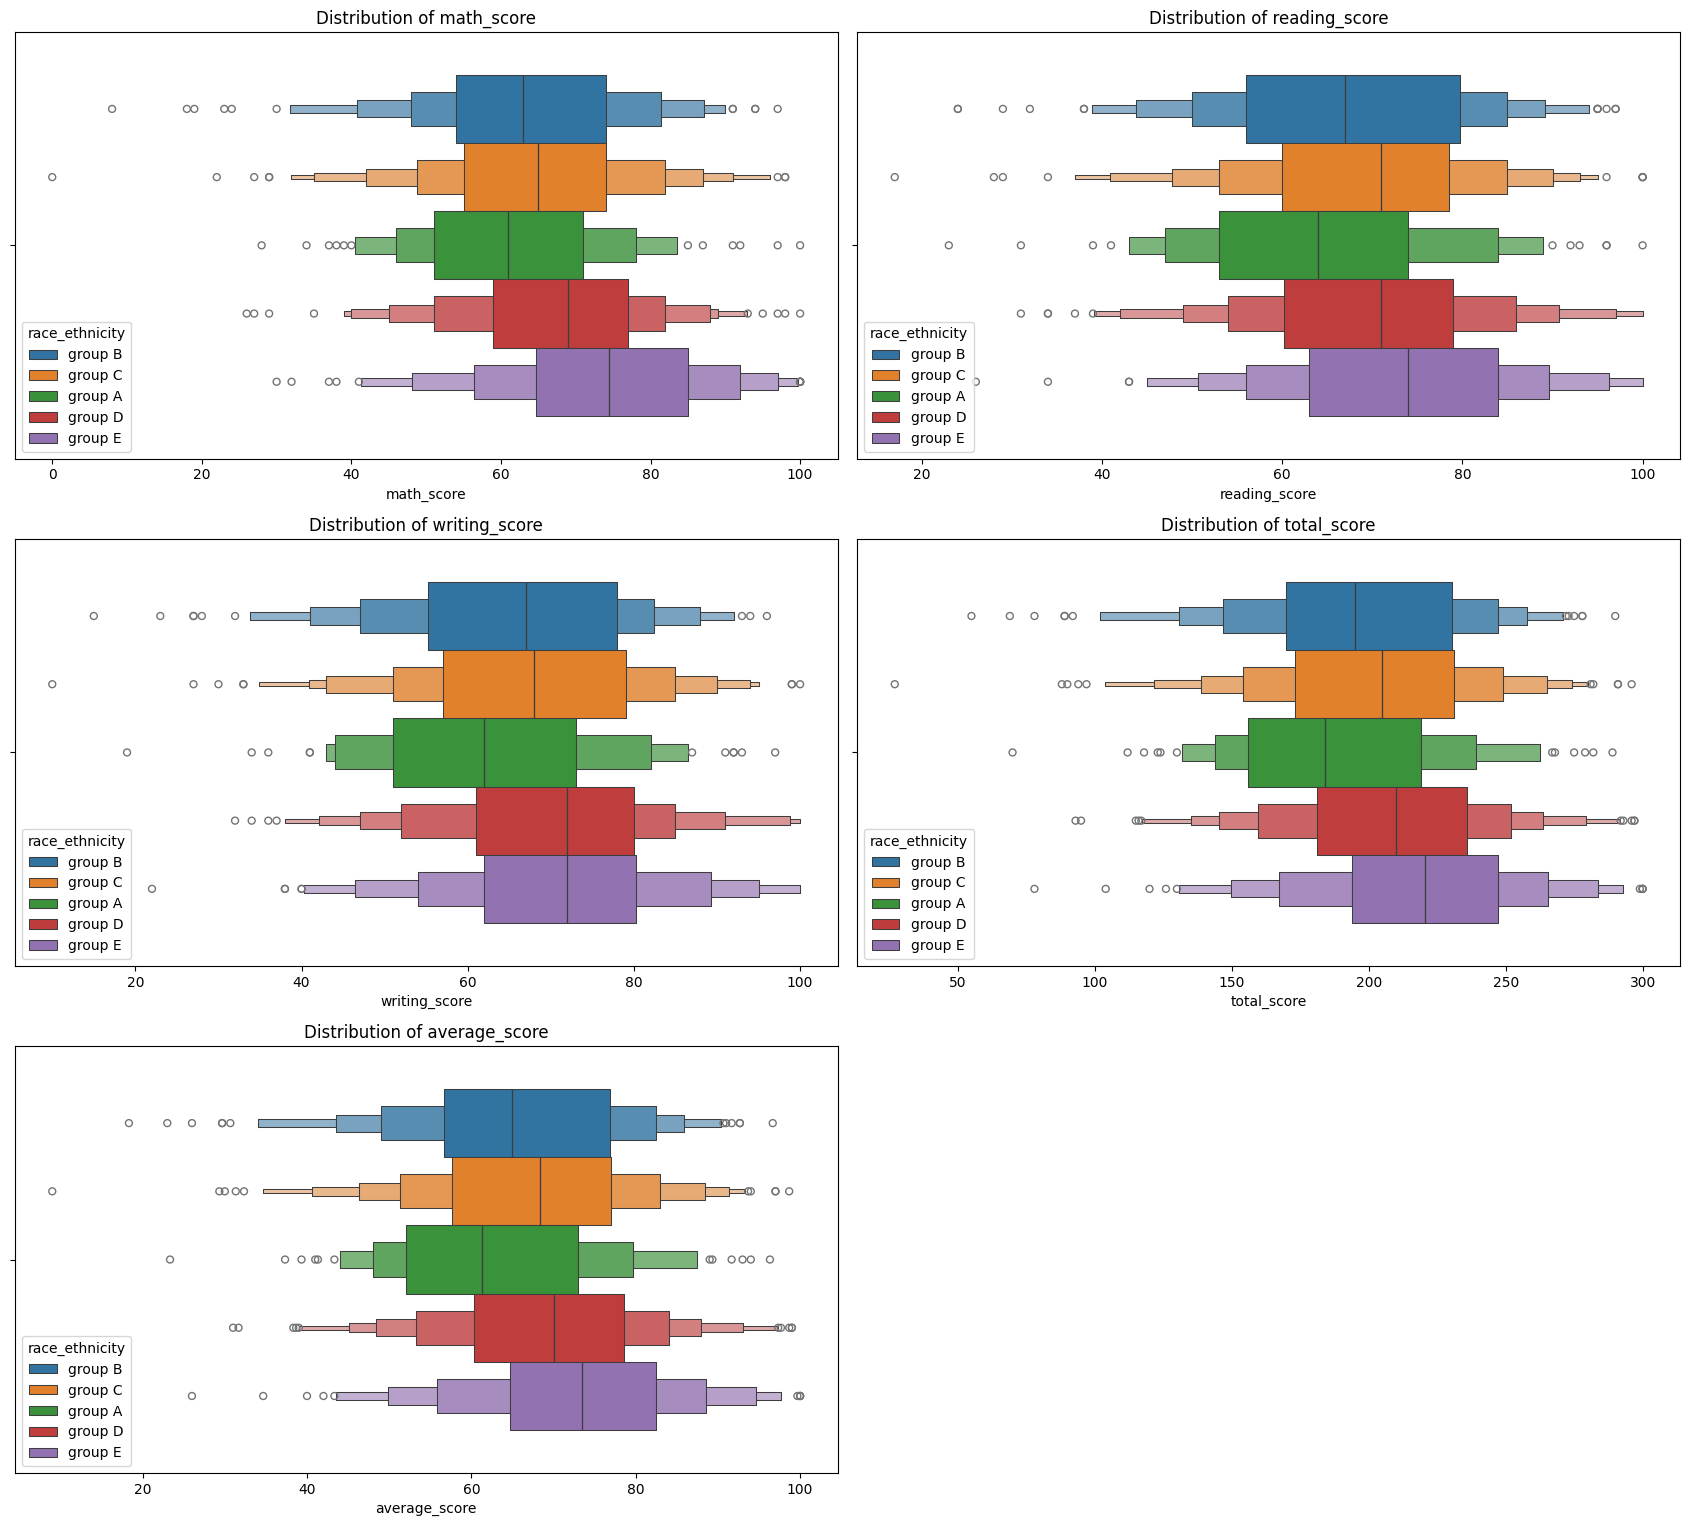

In [30]:
plt.figure(figsize = (17,20))
for i,column in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    sns.boxenplot(data = df, x = column,  hue= 'race_ethnicity')

    
    plt.title('Distribution of {0}'.format(column))

plt.tight_layout()
plt.show()

In [31]:
for key,values in categories_dict.items():
  for v in values:
    print("Mean math score of {0} is: {1}".format(v,round(df[df[key] == v]['math_score'].mean(),2)))
  print('-'*55)

Mean math score of female is: 63.63
Mean math score of male is: 68.73
-------------------------------------------------------
Mean math score of group B is: 63.45
Mean math score of group C is: 64.46
Mean math score of group A is: 61.63
Mean math score of group D is: 67.36
Mean math score of group E is: 73.82
-------------------------------------------------------
Mean math score of bachelor's degree is: 69.39
Mean math score of some college is: 67.13
Mean math score of master's degree is: 69.75
Mean math score of associate's degree is: 67.88
Mean math score of high school is: 62.14
Mean math score of some high school is: 63.5
-------------------------------------------------------
Mean math score of standard is: 70.03
Mean math score of free/reduced is: 58.92
-------------------------------------------------------
Mean math score of none is: 64.08
Mean math score of completed is: 69.7
-------------------------------------------------------
